In [40]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [46]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    e = numpy.abs(f - F)
    r = e/numpy.abs(f)
    p = numpy.floor(-numpy.log10(r/5.)).astype(int)

    
    return e, r, p


In [47]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [48]:
import math as math

F1 = 22/7
F2 = 355/113

print(errors(math.pi, F1))

print(errors(math.pi, F2))


(np.float64(0.0012644892673496777), np.float64(0.0004024994347707008), np.int64(4))
(np.float64(2.667641894049666e-07), np.float64(8.49136787674061e-08), np.int64(7))


The second approximation, with F = 355/113, is a more accurate approximation given its higher level of decimal precision, 7 vs 4. As well as 22/7 having a larger relative and absolute error.

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [49]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    # YOUR CODE HERE

    list_1 = numpy.arange(10**(d-1), 10**d)
    list_2 = numpy.arange(10**(d-1), 10**d)
    min_error = float('inf')
    best_m = 1
    best_n = 1
    best_p = 0

    for n in list_1:
        e,r,p=errors(numpy.pi, list_2/n)
        if p[numpy.argmax(p)] > best_p:
            best_p = p[numpy.argmax(p)]
            best_m = list_1[numpy.argmax(p)]
            best_n = n
    return best_m, best_n


In [62]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 98668/31407 = 3.1415926385837554:	 e = 1.5006037745735057e-08,	, r = 4.776570166914593e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

166


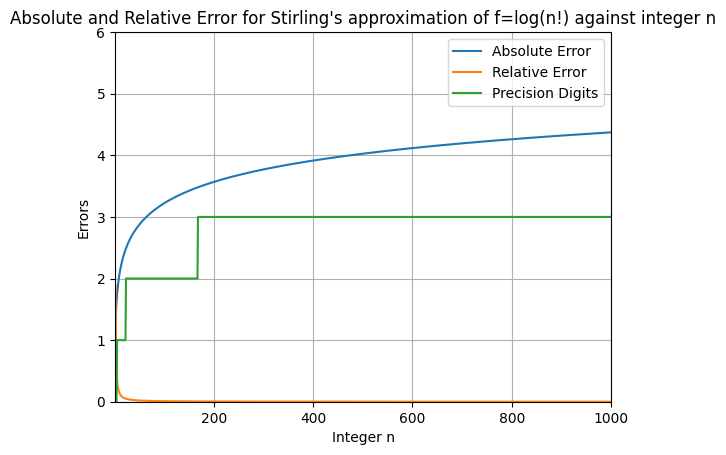

In [51]:
end = 1000

n = numpy.arange(2, end, dtype=int)

test_n = numpy.arange(2, end, dtype=int)
test_n = numpy.log(test_n)
for i in range(1, end-2):
    test_n[i] += test_n[i-1]

e, r,  p = errors(test_n, n*numpy.log(n)-n)

print(numpy.argmax(p))

plt.plot(n, e, label='Absolute Error')
plt.plot(n, r, label='Relative Error')
plt.plot(n, p, label='Precision Digits')  
plt.legend()
plt.title("Absolute and Relative Error for Stirling's approximation of f=log(n!) against integer n")                
plt.xlabel("Integer n")
plt.ylabel("Errors")
plt.xlim([1, end])
plt.ylim([0, 6])
plt.grid()
plt.show()



For p=4 the smallest value of n is around n = 1451. We achieve this in bonding the p array with max p=4.

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


Sum:
\begin{align}
    \frac{1}{1-\Delta x} &= 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) \\
    \cosh  \Delta x &= 1 + \Delta x + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6) \\
\end{align}
We take the min(4,6) for small values of x to calculate which O we use:
$$
    \frac{1}{1-\Delta x} + \cosh \Delta x = 2 + 2\Delta x + \frac{3 \Delta x^2}{2} + \Delta x^3 + \frac{ \Delta x^4}{24} + O(\Delta x^4)
$$

Product:
\begin{align}
    \frac{1}{1-\Delta x} &= 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) \\
    \cosh  \Delta x &= 1 + \Delta x + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6) \\
\end{align}
We take the min(4,6) for small values of x to calculate which O we use:
$$
    \frac{1}{1-\Delta x} \times \cosh \Delta x = 1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + \frac{ 13\Delta x^4}{24} + \frac{13\Delta x^5}{24} + \frac{\Delta x^6}{24} + \frac{\Delta x^7}{24} + O(\Delta x^{4})
$$


## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

Given **Taylor's Theorem:**  Let $f(x) \in C^{N+1}[a,b]$ and $x_0 \in [a,b]$, then for all $x \in (a,b)$ there exists a number $c = c(x)$ that lies between $x_0$ and $x$ such that

$$ f(x) = T_N(x) + R_N(x)$$

where $T_N(x)$ is the Taylor polynomial approximation

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(N+1)}(c) \cdot (x - x_0)^{N+1}}{(N+1)!}$$



In the  problem, the Taylor Series polynomial approximation around $x_0=0$ of of $e^x$ is

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!} $$

Rn represents the remaining part of the series that we have not accoutned for, therefore we ca write Tn as

$$ f = e^x = T_n + R_n $$

Where Tn can be approximated by the sum

$$ T_n = \sum_{n=0}^{N} \frac{x^n}{n!}  $$

Thus the term Rn can be written as (n+1) which we had no accounted for

$$ R_N(x) = \frac{f^{(N+1)}(c) \cdot (x - x_0)^{N+1}}{(N+1)!}$$

Where any derivative of f = e^x will take the form of e^x meaning:

$$R_N(x) = \frac{e^{(x)}(c) \cdot (x)^{N+1}}{(N+1)!}$$

Now, applying the function for relative error:

$$ r = \frac{|f - F|}{|f|} $$

$$ r = \frac{|T_n + R_n - T_n|}{|e^x|} = \frac{\frac{|e^{(x)}(c) \cdot (x)^{N+1}|}{|(N+1)!|}}{|e^x|} \leq | \frac{ (x)^{N+1}}{(N+1)!}|$$

Thus we have shown that r_n can be at most this value.



**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

YOUR ANSWER HERE:


Following in from part 3a:
$$ r = | \frac{ (x)^{N+1}}{(N+1)!}|$$
And we know that
$$ r \leq |\frac{ (x)^{N+1}}{(N+1)!}| \leq \epsilon_{\text{machine}}$$
Using the recommend Stirling approximation:
$$|\frac{ (x)^{N+1}}{(N+1)!}| \leq \epsilon_{\text{machine}} = \frac{(N+1)log(x)}{log((N+1)!)} = (N+1)log(x) - log((N+1)!) \leq log(\epsilon_{\text{machine}})$$

$$ (N+1)log(x) - (N+1)log(N+1) + (N+1) \leq log(\epsilon_{\text{machine}})$$

To simplify the equation:
$$ log(x) - log(N+1) + 1  \leq \frac{log(\epsilon_{\text{machine}})}{N+1}$$
$$ log(x) + 1  \leq \frac{log(\epsilon_{\text{machine}})}{N+1} + log(N+1)$$
$$ log(x \times e) \leq \frac{log(\epsilon_{\text{machine}})}{N+1} + log(N+1)$$

Reversing the logarithm:

$$ x \times e \leq \epsilon_{\text{machine}} ^ {\frac{1}{N+1}} + (N+1) $$

TO PROVE:
$$ x \times e < n$$

We have shown this because $\epsilon_{\text{machine}} ^ {\frac{1}{N+1}}$ will be a small but positive number and we add 1, meaning that if 

$$ x \times e \leq \epsilon_{\text{machine}} ^ {\frac{1}{N+1}} + (N+1) $$

the we have proven that

$$ x \times e < n$$

holds.

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [52]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    max_n = int(numpy.abs(x * numpy.exp(1))) + 200
    tn = 0
    p = numpy.zeros(max_n)
    
    for i in range(0, max_n):
        p[i] = 1/factorial(i)

    p = numpy.flip(p) 
    
    for coefficient in p:
        tn = tn * numpy.abs(x) + coefficient
        
    #flipping tnn if x is negative
    if(x < 0):
        tn = 1/tn
    
    return tn, max_n


In [55]:
# Feel free to test your code here and/or make a plot of errors
eps = numpy.finfo(float).eps
x=709
Tn, maxN = Tn_exp(float(x))
print(Tn)
e,r,p = errors(numpy.exp(x), Tn)
print(numpy.exp(x))
print(r/eps)

e1,r1,p1 = errors(numpy.exp(709), numpy.exp(1)**709)
print(r1/eps)

7.37704835207159e+177
8.218407461554972e+307
4503599627370496.0
170.0702257577037


In [35]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

My relative error and f=numpy.exp(709) is 4503599627370496.0. This holds as at a high number,  the routine will become very inaccurate, which w can see comparing 8.21 * 10^307 vs 7.37 *10^177.
The second part has a relative error of 170.0702257577037, which is far more accurate.

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [63]:

def Tn_exp(x, tolerance=16 * np.finfo(float).eps):
    
    assert isinstance(x, float), "Input x must be a float."
    
    
    tn = 1.0 
    term = 1.0
    n = 1
    abs_x = np.abs(x)
    
    while abs(term) > tolerance:
        term *= abs_x / n 
        tn += term
        n += 1
    
   
    if x < 0:
        tn = 1.0 / tn
    
    return tn, n

x = -709.0
tn, num_terms = Tn_exp(x)
print(f"Approximation of e^{x} is {tn} using {num_terms} terms.")


exact = np.exp(x)
relative_error = np.abs(tn - exact) / np.abs(exact)
print(f"Relative error: {relative_error}")


Approximation of e^-709.0 is 1.2167807506234205e-308 using 1957 terms.
Relative error: 2.0302163951398386e-15


In [64]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 30.365898500633385 eps_machine


AssertionError: 

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

In a 3-digit precision base 4 system:

$$
    f=\pm d_1 . d_2 d_3 \times 4^E \quad \text{with} \quad E \in [-3, 3]
$$

Here, chirality takes on the posoitive of negative form. Therefore, we multiply all digits by 2 in order to account for this:

$$d_1 \text{ can take on three digits [1, 2, 3] to represent the bases, whereas }d_2 \text{ and } d_3 \text{can take on values of [0,1,2,3].}$$

All of our mantissa multiplied by 7 can be represented by e which takes on 7 different integers.

$$\text{The total number of values we can represent is } 2 \times 3 \times 4 \times 4 \times 7 + 1 = 673$$
Here, we add 1 to total numbers represented to include 0.

$$\text{The underflow is }1.00 \times 4^{-3} \text{ and the overflow is }3.33 \times 4^3.$$

$$\text{To calculate }\epsilon_{mach}\text{, we consider the smallest value to add to }\epsilon + 1\text{ in order to reach > 1. This takes the form of} 1.00 \times 4^{-2}$$



**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

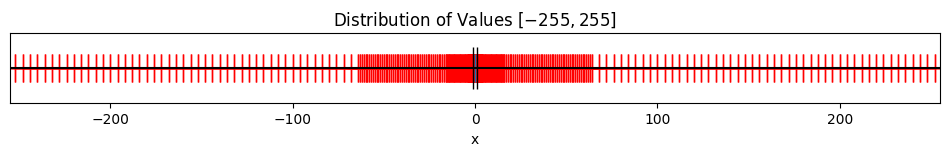

In [65]:
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [3, 2, 1, 0, -1, 2, 3]

fig = plt.figure(figsize=(12.0,2.0))
axes = fig.add_subplot(2, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '|', markersize=20)
axes.plot([-1., 1.], [0.0, 0.0], 'k|', markersize=30)

axes.plot([-255.0, 255.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values $[-255, 255]$")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-255, 255])


plt.show()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

Consider the a-digit precision base 4 system with E between values -b, c:
$$
    f=\pm d_1 . d_2 d_3 ... d_a \times 4^E \quad \text{with} \quad E \in [-b, c]
$$
   Also consider the a-digit precision base 2 system with E between values b, c:
$$
    f=\pm d_1 . d_2 d_3 ... d_a \times 2^E \quad \text{with} \quad E \in [-b, c]
$$    
    Let d represent the integers between [-b,c].
$$       
    \text{The total number of values we can represent in base 4 is } 2 \times 3 \times 4^{a-1} \times d + 1 = 6d \times 2^{2a-2} + 1
$$
$$
    \text{While the total number of values we can represent in base 2 is } 2 \times 1 \times 2^{a-1} \times d + 1 = 2d \times 2^{a-1} + 1
$$
Same as before, wee will add 1 to the total numbers represented so we can include 0.
$$
\text{Therefore, we represent } (6d \times 2^{2a-2} + 1) - (2d \times 2^{a-1} + 1) \text{ or } 3d \times 2^{2a-1} - d \times 2^a \text { more values in base 4 than in base 2. This is with the same mantissa and the same E constraints}
$$
